In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [147]:
#Importing the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [148]:
#Checking the shape of a dataset
df.shape

(891, 12)

In [149]:
#Previewing the first 20 rows of the data
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
#Listing down the column names
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

  **Categorical Columns:**

  1) Survived    
  2) Pclass  
  3) Sex  
  4) Sibsp     
  5) Parch             
  6) Embarked

   
  


  **Numerical Columns:**

  1) PassengerId    
  2) Age    
  3) Fare
  

  

  **Mixed Columns:**

  1) Name     
  2) Ticket   
  3) Cabin
  


In [151]:
# Viewing concise summary of the DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
#Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Information Gained with the data we viewed so far**

1) There are missing values in Age, Cabin, Embarked        
2) More than 70% values are missing in Cabin column        
3) Few columns have inappropriate data types

In [153]:
#storing the original dataframe into another variable before doing changes
new_df = df.copy()

In [154]:
#Dropping the Cabin Column due to its mass null values
new_df = new_df.drop('Cabin',axis=1)

In [155]:
#Dropping the "Ticket" column due to its limited relevance and informational value.
new_df = new_df.drop('Ticket',axis=1)

In [156]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [157]:
#Dealing with missing values in Age column
#Filling the missing values with mean
new_df['Age'].fillna(new_df['Age'].mean(), inplace=True)

In [158]:
#We can also fill the missing values in the Age column with the help of Name column
def extract(x):
    temp = x.split(" ")
    if "Mr." in temp:
        return "Mr"
    elif "Mrs." in temp:
        return "Mrs"
    elif "Miss." in temp:
        return "Miss"
    elif "Master." in temp:
        return "Master"
    elif "Dr." in temp:
        return "Dr"
    else:
        return None

In [159]:
new_df["Title"] = new_df["Name"].apply(extract)

In [160]:
new_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', None, 'Dr'], dtype=object)

In [161]:
print("Mr." , np.mean(new_df[new_df["Title"] == "Mr"]["Age"]))
print("Mrs." , np.mean(new_df[new_df["Title"] == "Mrs"]["Age"]))
print("Miss." , np.mean(new_df[new_df["Title"] == "Miss"]["Age"]))
print("Master." , np.mean(new_df[new_df["Title"] == "Master"]["Age"]))
print("Dr." , np.mean(new_df[new_df["Title"] == "Dr"]["Age"]))

Mr. 31.753762088974856
Mrs. 35.055080000000004
Miss. 23.341583710407235
Master. 7.086661764705883
Dr. 40.242731092436976


In [162]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [163]:
#Checking the added values in place of null
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        871 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [164]:
#Dealing with missing values in Embarked column
#Finding the most appeared value in Embarked column

new_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [165]:
new_df['Embarked'].fillna('S', inplace = True)

In [166]:
new_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [167]:
new_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

**Changing Data Type for the following columns**      
1) Survived(Category)    
2) PClass(Category)       
3) Sex(Category)      
4) Age(int)                   
5) Embarked(Category)

In [168]:
new_df['Survived']=new_df['Survived'].astype('category')
new_df['Pclass']=new_df['Pclass'].astype('category')
new_df['Sex']=new_df['Sex'].astype('category')
new_df['Age']=new_df['Age'].astype('int')
new_df['Embarked']=new_df['Embarked'].astype('category')

In [169]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    category
 10  Title        871 non-null    object  
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [170]:
data_frame=new_df.copy()

In [171]:
data_frame.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


**UNIVARIATE ANALYSIS**

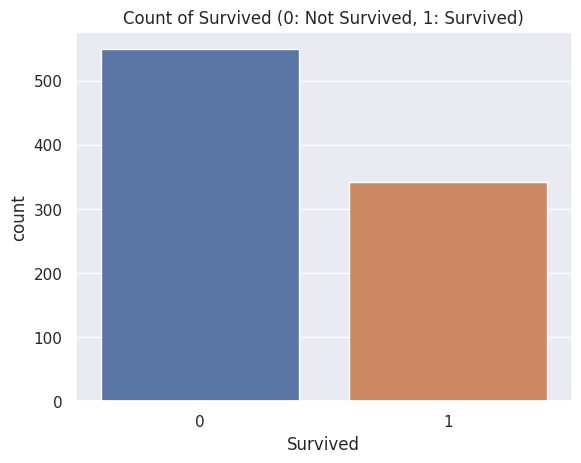

Out of 891, 62% people died in the accident


In [172]:
# Assuming '0' represents not survived and '1' represents survived
survived_counts = data_frame['Survived'].value_counts()

# Calculate the percentage of individuals who did not survive
death_percent = round((survived_counts.get(0, 0) / len(data_frame)) * 100)

# Create a count plot for 'Survived'
sns.countplot(x='Survived', data=data_frame)
plt.title('Count of Survived (0: Not Survived, 1: Survived)')
plt.show()

print('Out of {}, {}% people died in the accident'.format(len(data_frame), death_percent))



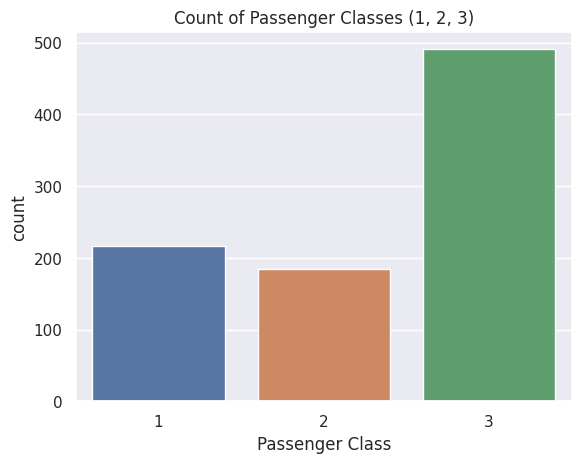

In [173]:
pclass_counts = data_frame['Pclass'].value_counts()

# Calculating the percentage distribution of passenger classes
pclass_percentages = (pclass_counts / len(data_frame)) * 100

# Creating a count plot for 'Pclass'
sns.countplot(x='Pclass', data=data_frame)
plt.title('Count of Passenger Classes (1, 2, 3)')
plt.xlabel('Passenger Class')
plt.show()

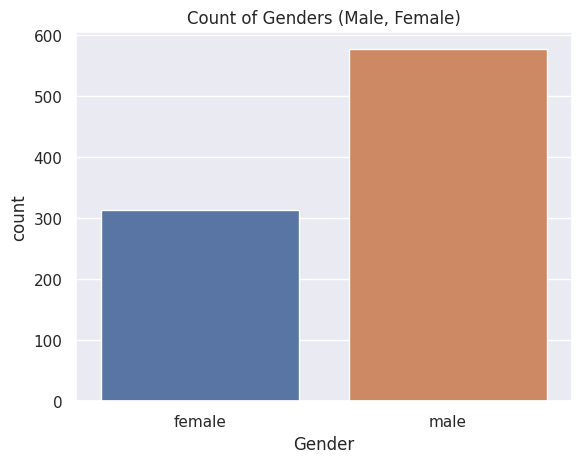

Percentage Distribution of Genders:
male      64.758698
female    35.241302
Name: Sex, dtype: float64


In [174]:
sex_counts = data_frame['Sex'].value_counts()

# Calculate the percentage distribution of genders
sex_percentages = (sex_counts / len(data_frame)) * 100

# Create a count plot for 'Sex'
sns.countplot(x='Sex', data=data_frame)
plt.title('Count of Genders (Male, Female)')
plt.xlabel('Gender')
plt.show()

print('Percentage Distribution of Genders:')
print(sex_percentages)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


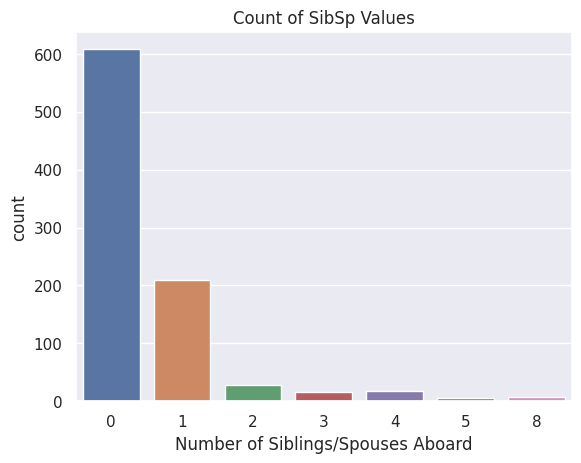

In [175]:
print(data_frame['SibSp'].value_counts())

# Create count plot for 'SibSp'
sns.countplot(x='SibSp', data=data_frame)
plt.title('Count of SibSp Values')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


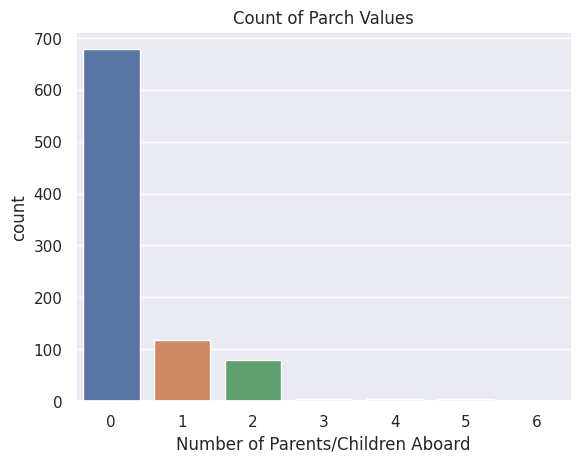

In [176]:
print(data_frame['Parch'].value_counts())

# Create count plot for 'Parch'
sns.countplot(x='Parch', data=data_frame)
plt.title('Count of Parch Values')
plt.xlabel('Number of Parents/Children Aboard')
plt.show()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


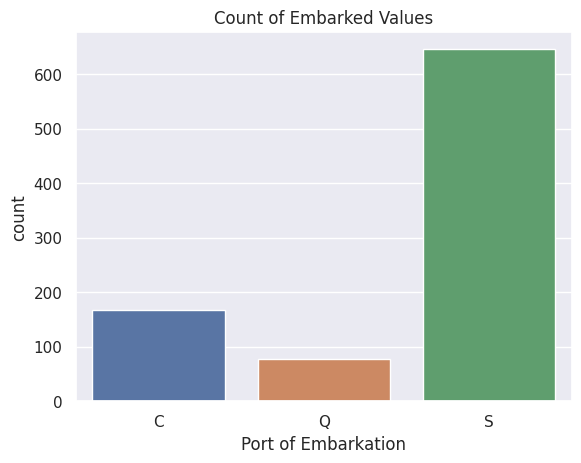

In [177]:
print(data_frame['Embarked'].value_counts())

# Create count plot for 'Embarked'
sns.countplot(x='Embarked', data=data_frame)
plt.title('Count of Embarked Values')
plt.xlabel('Port of Embarkation')
plt.show()

<ipython-input-178-5dbac771032f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['Age']) #distplot is used to visualize the distribution of univariate data (data with only one variable).


0.45956263424701577
0.9865867453652877


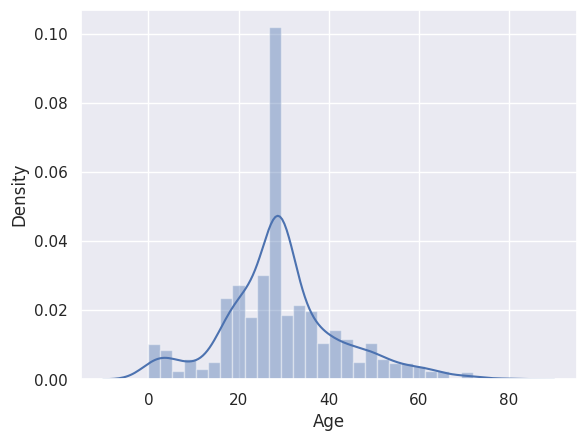

In [178]:
sns.distplot(data_frame['Age']) #distplot is used to visualize the distribution of univariate data (data with only one variable).

print(data_frame['Age'].skew())

print(data_frame['Age'].kurt())

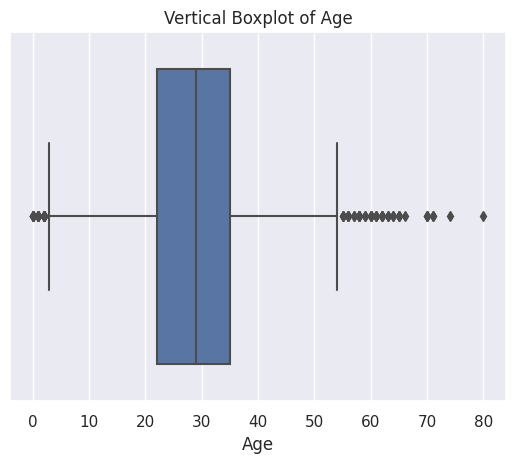

In [179]:
sns.boxplot(x='Age', data=data_frame)  # Boxplot gives a quick summary of the central tendency and spread of the data.
plt.title('Vertical Boxplot of Age')
plt.show()

In [180]:
#Observing the boxplot, it is evident that there are outliers in the higher age range

In [181]:
print("People with age in between 60 and 70 are",data_frame[(data_frame['Age']>60) & (data_frame['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",data_frame[(data_frame['Age']>=70) & (data_frame['Age']<=75)].shape[0])
print("People with age greater than 75 are",data_frame[data_frame['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",data_frame[data_frame['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


In [182]:
#For all practical purposes age can be cosidered as normal distribution
#Deeper analysis is required for outlier detection

<ipython-input-183-916d8cbdfd7b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

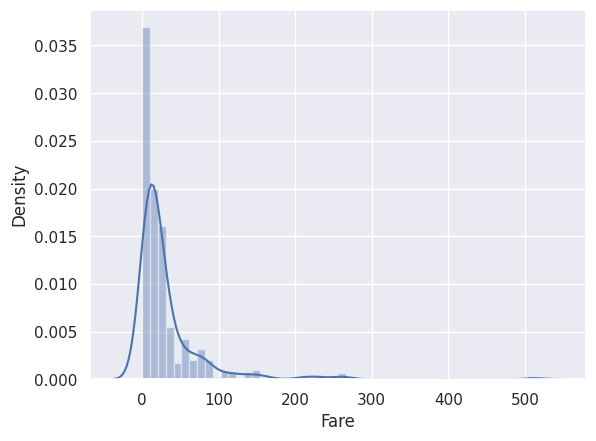

In [183]:
sns.distplot(data_frame['Fare'])

In [184]:
print(data_frame['Fare'].skew())
print(data_frame['Fare'].kurt())

4.787316519674893
33.39814088089868


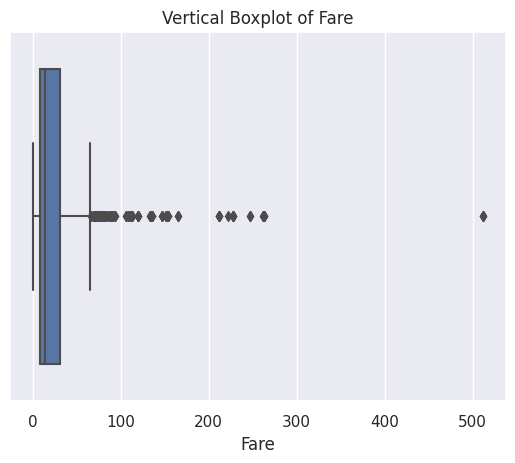

In [185]:
sns.boxplot(x='Fare', data=data_frame)
plt.title('Vertical Boxplot of Fare')
plt.show()

In [186]:
print("People with fare in between $200 and $300",data_frame[(data_frame['Fare']>200) & (data_frame['Fare']<300)].shape[0])
print("People with fare in greater than $300",data_frame[data_frame['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


In [187]:
#Highly skewed data, a lot of people had cheaper tickets
#Outliers are there in the data

**MULTIVARIATE ANALYSIS**

Percentage Distribution of Survived by Pclass:
Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


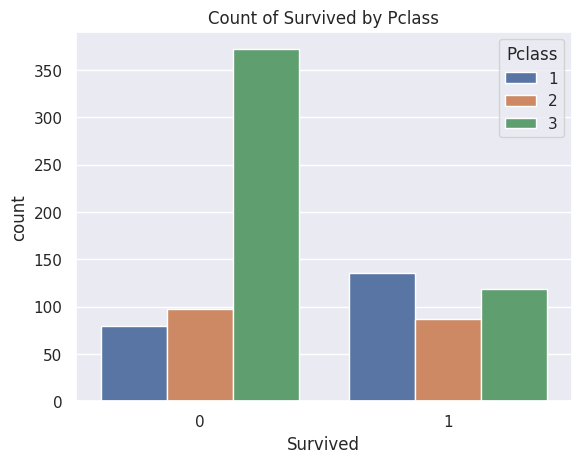

In [188]:
# Generate a percentage table
percentage_table = pd.crosstab(data_frame['Pclass'], data_frame['Survived'], normalize='index') * 100
percentage_table = percentage_table.round(1)

print('Percentage Distribution of Survived by Pclass:')
print(percentage_table)

# Create a count plot with hue
sns.countplot(x='Survived', hue='Pclass', data=data_frame)
plt.title('Count of Survived by Pclass')
plt.show()

Percentage Distribution of Survived by Sex:
Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


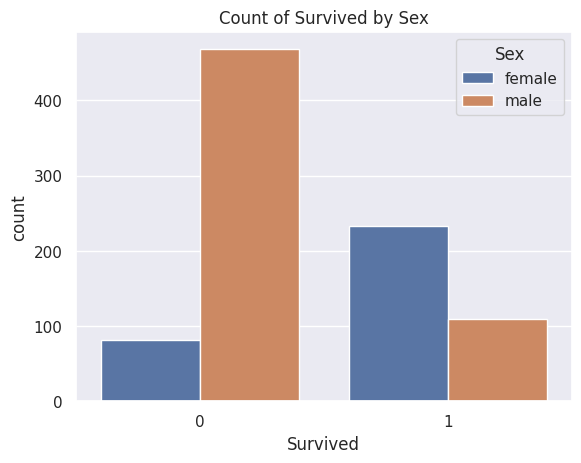

In [189]:
percentage_table = pd.crosstab(data_frame['Sex'], data_frame['Survived'], normalize='index') * 100
percentage_table = percentage_table.round(1)

print('Percentage Distribution of Survived by Sex:')
print(percentage_table)

sns.countplot(x='Survived', hue='Sex', data=data_frame)
plt.title('Count of Survived by Sex')
plt.show()


Percentage Distribution of Survived by Embarked:
Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.3  33.7


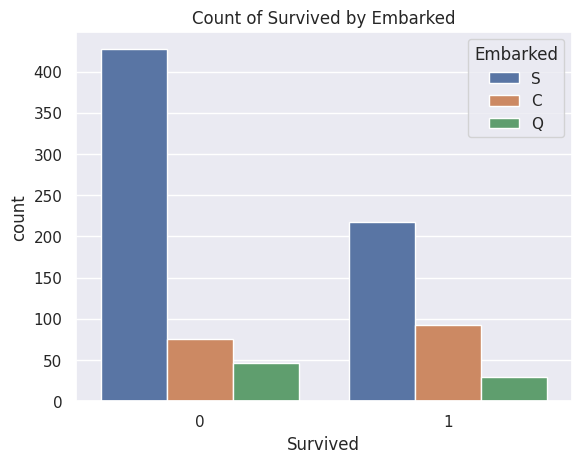

In [190]:
percentage_table = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
percentage_table = percentage_table.round(1)

print('Percentage Distribution of Survived by Embarked:')
print(percentage_table)

sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Count of Survived by Embarked')
plt.show()

<ipython-input-191-f671c5327ffa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[data_frame['Survived']==0]['Age'])
<ipython-input-191-f671c5327ffa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[data_frame['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

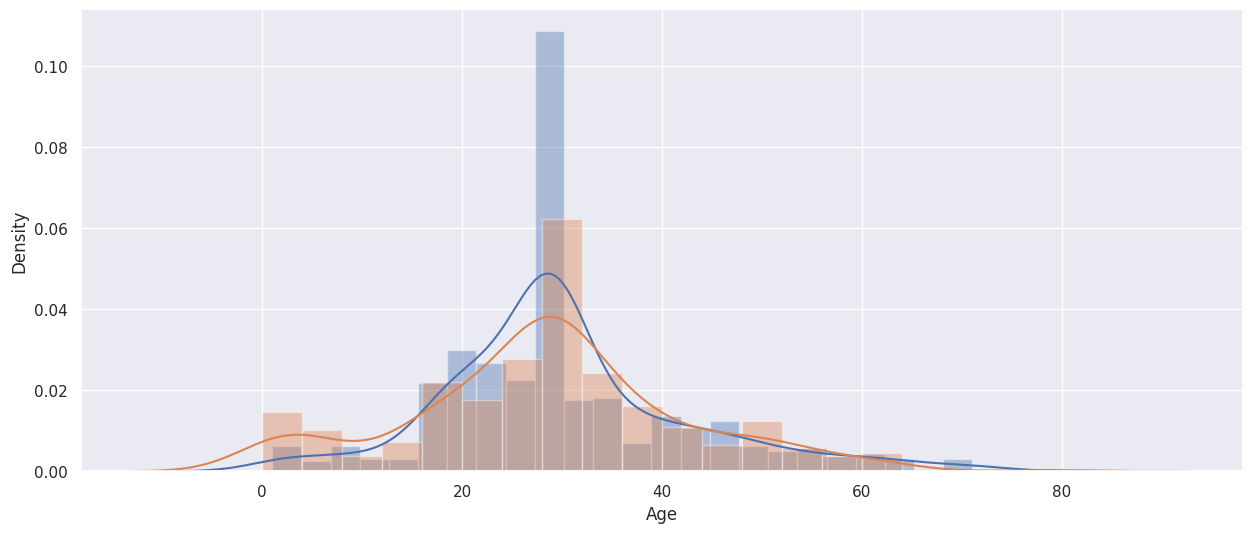

In [191]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(data_frame[data_frame['Survived']==0]['Age'])
sns.distplot(data_frame[data_frame['Survived']==1]['Age'])

<ipython-input-192-95b32cf34748>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[data_frame['Survived']==0]['Fare'])
<ipython-input-192-95b32cf34748>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[data_frame['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

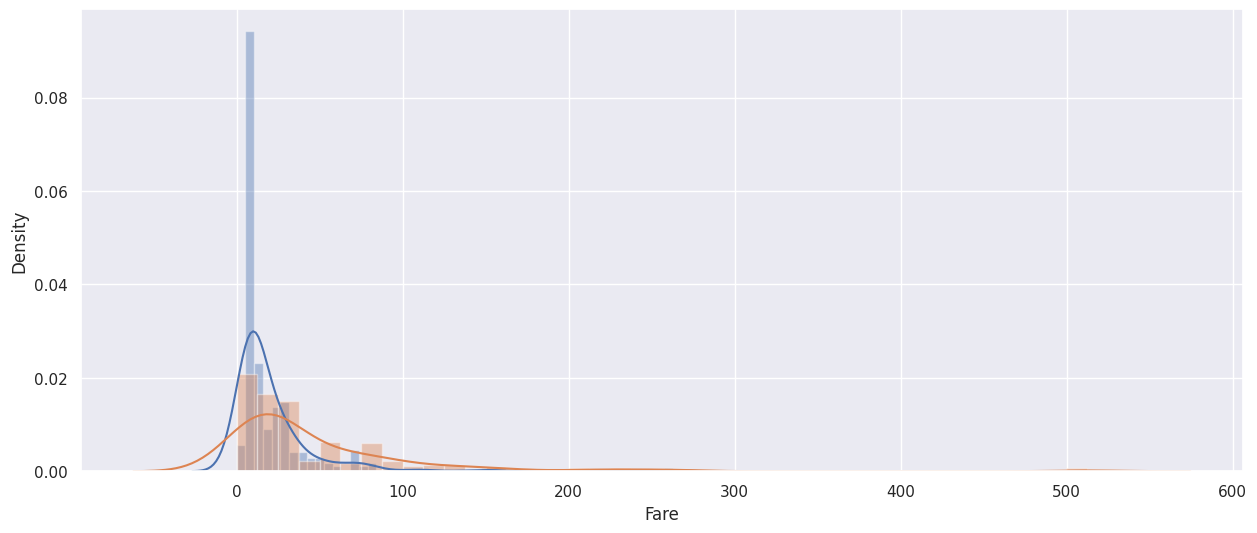

In [192]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(data_frame[data_frame['Survived']==0]['Fare'])
sns.distplot(data_frame[data_frame['Survived']==1]['Fare'])

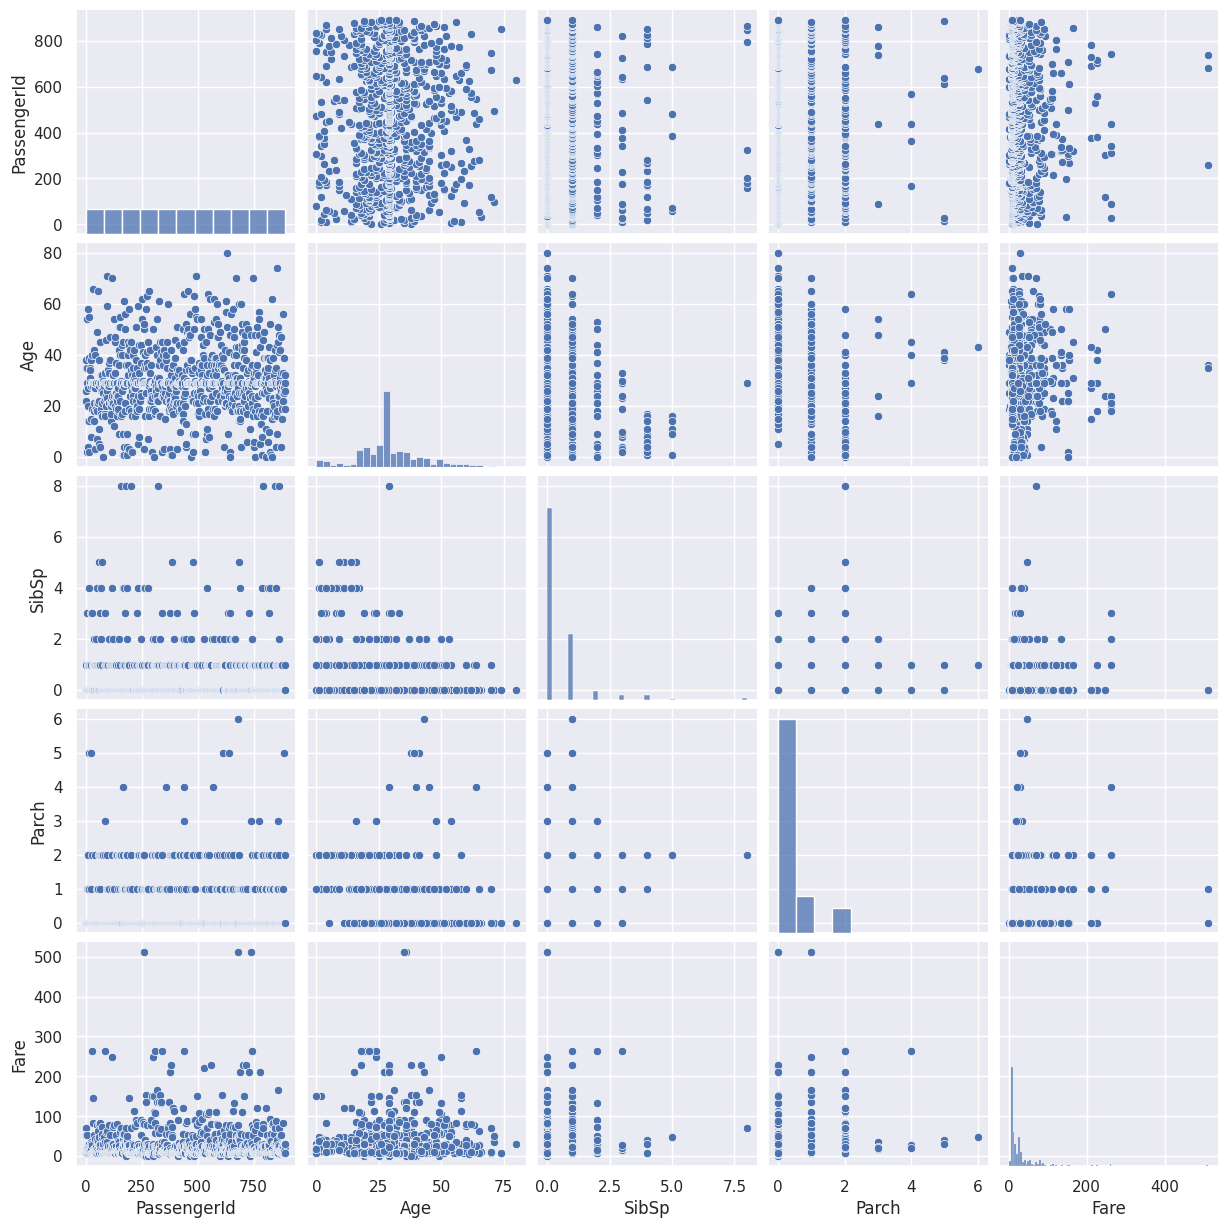

In [193]:
sns.pairplot(data_frame)

<ipython-input-194-b842826d11c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_frame.corr())


<Axes: >

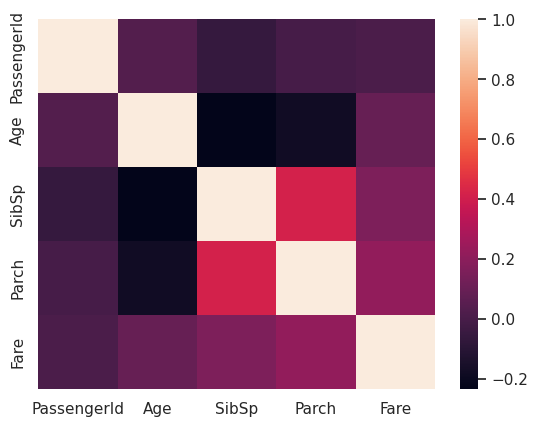

In [194]:
sns.heatmap(data_frame.corr())

**FEATURE ENGINEERING**

In [195]:
#creating a new column by the name of family which will be the sum of SibSp and Parch cols

data_frame['family_size']=data_frame['Parch'] + data_frame['SibSp']

In [196]:
data_frame.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,227.5250,C,Mrs,1
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34,1,1,14.4000,S,Mr,2
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43,0,1,211.3375,S,Mrs,1
303,304,1,2,"Keane, Miss. Nora A",female,29,0,0,12.3500,Q,Miss,0
262,263,0,1,"Taussig, Mr. Emil",male,52,1,1,79.6500,S,Mr,2


In [197]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [198]:
data_frame['family_type']=data_frame['family_size'].apply(family_type)

In [199]:
data_frame.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size,family_type
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63,0,0,9.5875,S,Mrs,0,Alone
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27,1,0,53.1000,S,Mr,1,Medium
773,774,0,3,"Elias, Mr. Dibo",male,29,0,0,7.2250,C,Mr,0,Alone
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29,1,0,26.0000,S,Mrs,1,Medium
420,421,0,3,"Gheorgheff, Mr. Stanio",male,29,0,0,7.8958,C,Mr,0,Alone


In [200]:
dp=data_frame.copy()

In [201]:
dp.drop(columns=['SibSp','Parch','family_size'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,7.2500,S,Mr,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,71.2833,C,Mrs,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,7.9250,S,Miss,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.1000,S,Mrs,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,8.0500,S,Mr,Alone
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,13.0000,S,None,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,30.0000,S,Miss,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,23.4500,S,Miss,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26,30.0000,C,Mr,Alone


In [202]:
pd.crosstab(dp['family_type'], dp['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


**Detecting outliers**    
Numerical Data:  
if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR   
Categorical data:     
If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [203]:
dp=dp[dp['Age']<(dp['Age'].mean() + 3 * dp['Age'].std())]
dp.shape

(884, 13)

In [204]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(dp['Fare'],25)
Q3= np.percentile(dp['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

dp=dp[(dp['Fare']>outlier_low) & (dp['Fare']<outlier_high)]

In [205]:
# One hot encoding

dp.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=dp, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Title,family_size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,1,0,7.2500,Mr,1,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,0,0,7.9250,Miss,0,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,53.1000,Mrs,1,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,0,0,8.0500,Mr,0,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,0,0,8.4583,Mr,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,0,0,13.0000,None,0,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,0,0,30.0000,Miss,0,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,1,2,23.4500,Miss,3,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,0,0,30.0000,Mr,0,0,0,1,0,0,0,0


In [206]:
dp=pd.get_dummies(data=dp, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

In [207]:
dp.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Title,family_size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,1,0,7.2500,Mr,1,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,0,0,7.9250,Miss,0,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,53.1000,Mrs,1,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,0,0,8.0500,Mr,0,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,0,0,8.4583,Mr,0,0,1,1,1,0,0,0


<ipython-input-208-cbb268e1d266>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dp.corr(), cmap='summer')


<Axes: >

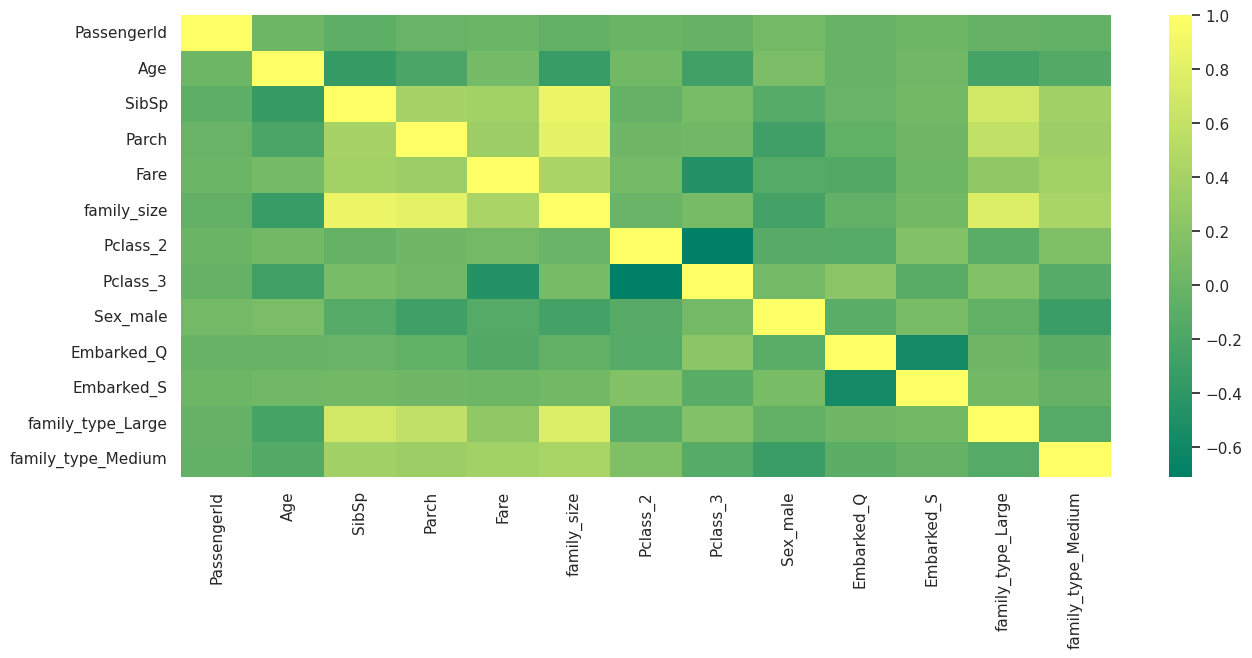

In [208]:
plt.figure(figsize=(15,6))
sns.heatmap(dp.corr(), cmap='summer')

**Drawing Conclusions**    
1) Chance of female survival is higher than male survival     
2) Travelling in Pclass 3 was deadliest       
3) Somehow, people going to C survived more     
4) People in the age range of 20 to 40 had a higher chance of not surviving    
5) People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone